<a href="https://colab.research.google.com/github/EternalSorrrow/bak/blob/master/nn_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 MNIST CNN - Simple CNN

In [0]:
#@title
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

data = mnist.load_data()

In [0]:
#@title
(x_train, y_train), (x_test, y_test) = data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

In [0]:
#@title
plt.figure()
plt.imshow(x_train[0], cmap = plt.cm.gray)

In [0]:
#@title
x_train, x_test = x_train / 255, x_test / 255 # Normalize data

In [0]:
#@title
x_train = x_train.reshape((-1, 28, 28, 1)) # Reshape data since the Keras expects an array of 3d (not 2d) tensors on input
x_test = x_test.reshape((-1, 28, 28, 1))

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

In [0]:
#@title
import numpy as np
np.unique(y_train)

In [0]:
#@title
cat_num = 10

y_train = keras.utils.to_categorical(y_train, cat_num)
y_test = keras.utils.to_categorical(y_test, cat_num) # Encode integer-expressed classes as a binary vectors

print(y_train.shape, y_test.shape)

In [0]:
#@title
print(y_train[0])

In [0]:
#@title
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25)) # !!! Doesn't work without dropout here

model.add(Flatten()) # ??? Why should we flatten the feature vector?

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
#@title
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [0]:
#@title
batch_size = 128
epochs = 25

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

In [0]:
#@title
eval_ = model.evaluate(x_test, y_test, verbose=0) # Score the model
print('Test loss:', eval_[0])
print('Test accuracy:', eval_[1])

Test loss: 0.05813348390585916
Test accuracy: 0.985

Nice!

More complex example: CIFAR-10 CNN

In [0]:
#@title
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt

data = cifar10.load_data()

In [0]:
#@title
(x_train, y_train), (x_test, y_test) = data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

In [0]:
#@title
print(x_train[0][0,0,:])

plt.figure()
plt.imshow(x_train[0], cmap = plt.cm.gray)

In [0]:
#@title
x_train, x_test = x_train / 255, x_test / 255 # Normalize data

In [0]:
#@title
print(x_train[0][0,0,:])

plt.figure()
plt.imshow(x_train[0], cmap = plt.cm.gray)

In [0]:
#@title
import numpy as np
np.unique(y_train)

In [0]:
#@title
cat_num = 10

y_train = keras.utils.to_categorical(y_train, cat_num)
y_test = keras.utils.to_categorical(y_test, cat_num) # Encode integer-expressed classes as a binary vectors

print(y_train.shape, y_test.shape)

In [0]:
#@title
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

#Copy-pasted previous model with the changed input_shape to (32, 23, 3)

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
#@title
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [0]:
#@title
batch_size = 128
epochs = 100

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

In [0]:
#@title
eval_ = model.evaluate(x_test, y_test, verbose=0) # Score the model
print('Test loss:', eval_[0])
print('Test accuracy:', eval_[1])

Test loss: 0.9657731695175171
Test accuracy: 0.6775

Shouldn't expect more from the such primitive model

In [0]:
#@title
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(32, (3,3), activation='relu')) # New convolution layer
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.15)) #Dropout 0.25 -> 0.15

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(64, (3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) # Additional Conv-Conv-MaxPool pattern with 64 filters

model.add(Dropout(0.15))  #One more dropout layer

model.add(Flatten())

model.add(Dense(512, activation='relu')) #128 -> 512 neurons
model.add(Dense(10, activation='softmax'))

In [0]:
#@title
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [0]:
#@title
batch_size = 128
epochs = 100

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

In [0]:
#@title
eval_ = model.evaluate(x_test, y_test, verbose=0) # Score the model
print('Test loss:', eval_[0])
print('Test accuracy:', eval_[1])

Test loss: 1.0367052768707274
Test accuracy: 0.7355

There's still work to do...

Some notices:
- Dropouts have a drastic impact on models's performance. Introduced models didn't work completely without them.
- Straightforward layer adding doesn't yield better result itself, with an any added layer hyperparameter tuning to realize deeper model's potential becomes substantially more tedious. Sometimes it's much easier to build simpler model rather than tune more complex.

MURA

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
!ls 'drive/My Drive/MURA-v1.1/' ; echo '' ; head -5 'drive/My Drive/MURA-v1.1/train_image_paths.csv' ; echo ''
!head -5 'drive/My Drive/MURA-v1.1/train_labeled_studies.csv'; echo '' ; head -5 'drive/My Drive/MURA-v1.1/valid_image_paths.csv'
!echo '' ; head -240 'drive/My Drive/MURA-v1.1/valid_labeled_studies.csv' | tail -6 

train		       train_labeled_studies.csv  valid_image_paths.csv
train_image_paths.csv  valid			  valid_labeled_studies.csv

MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png
MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image2.png
MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image3.png
MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image1.png
MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image2.png

MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/,1
MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/,1
MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/,1
MURA-v1.1/train/XR_SHOULDER/patient00004/study1_positive/,1
MURA-v1.1/train/XR_SHOULDER/patient00005/study1_positive/,1

MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image1.png
MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image2.png
MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image3.png
MURA-v1.1/valid/XR_WRIST/patient11185/st

In [27]:
import matplotlib.pyplot as plt
import cv2


img = cv2.imread('drive/My Drive/MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/image1.png')
img.shape

(512, 476, 3)

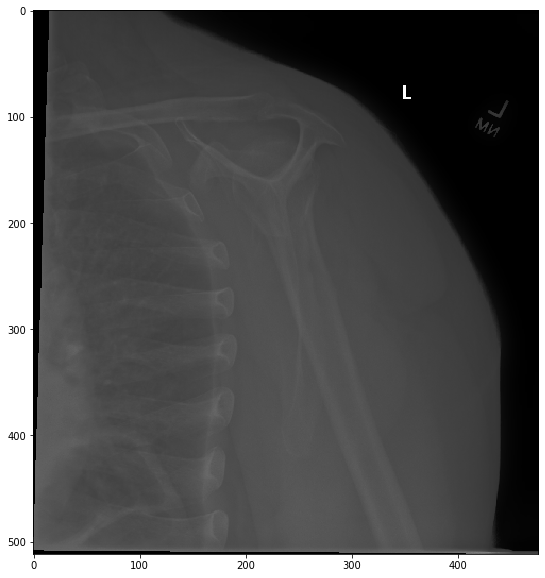

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(img, cmap = plt.cm.gray)

0.0 0.0


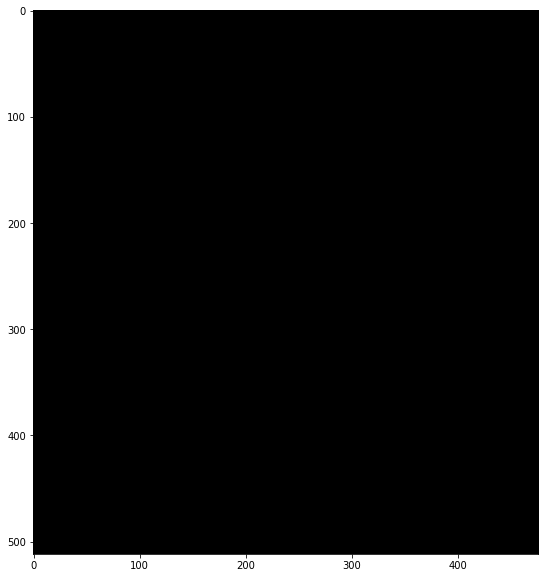

In [29]:
import numpy as np

#Sum of the cross-differences between all 3 pairs of channels to determine, can we use a grayscale image without substantional information loss
diff_map = np.abs(img[:,:,0]-img[:, :, 1])+np.abs(img[:,:,0]-img[:, :, 2]) + np.abs(img[:,:,1]-img[:,:,2])

plt.figure(figsize=(10,10))
plt.imshow(diff_map, cmap = plt.cm.gray)

print(np.mean(diff_map), np.var(diff_map))#All 3 channels are the same, we can reduce the input tensor size 3x by using the grayscale image

36809 1


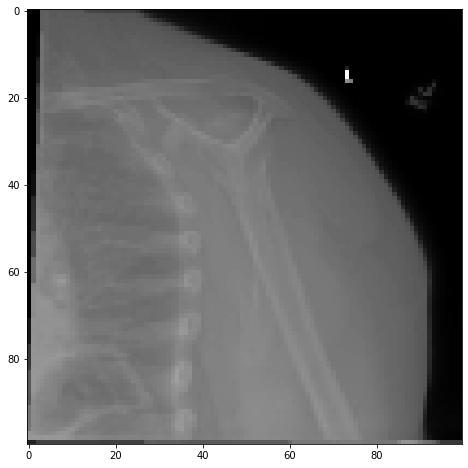

In [30]:
paths = None

image_size = (100, 100)
use_single_channel = True
interpolation = cv2.INTER_AREA

with open('drive/My Drive/MURA-v1.1/train_image_paths.csv', 'r') as file:
  paths = file.read().split('\n')

train_images = []
for path in paths[:100]:
  img = cv2.imread('drive/My Drive/' + path)
  if not img is None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, dsize=image_size, interpolation=interpolation)
    train_images.append((path, img))
    break

print(len(paths), len(train_images))

plt.figure(figsize=(8,8))
plt.imshow(train_images[0][1], cmap = plt.cm.gray)

It's supposed that the 100 x 100 x 1 image still contains enough information to recognise possible traumas/diseases

Total input tensor size reduction is something like ~5 x 5 x 3 = 75 times

Questions:

- Why should I use softmax as a last layer output? Where else the Softmax could be useful?
- What is neuron saturation? How does this relate with using the sigmoid functions?
- Why should I use sigmoids as an output functions?
- Gradient vanishing/explosion and it's relation with an activation function type
- How does the dropout layers increase the ANN learning performance? -> Geoffrey Hinton, drawback: longer learning
- What an ANN-building heuristics are exist?
- What are the details of an ANN overfitting?
- How does the convolutional layers learn?
- What is ANN regularization, what problemes does it solve and it's relations with performance.
- What are the factors influencing an ANN performance? Where an attention should be given while trying to implement an ANN to increase it's learning and decisioning speed?
- Kernel striding, its pros and cons
- Capsule Network -> Geoffrey Hinton
- Network in Network
- Transfer Learning
- SGD hyperparameters

AlexNet
- Local Response Normalization
- Overlapping Pooling
- Extracting 5 image patches and averaging the predictions for all of them to produce the final evaluation
- Applying the PCA on the image dependencies and adding multiples of a principal components